In [176]:
using Plots
using FileIO
using JLD2
using Base.Threads
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf
using LaTeXStrings

nthreads = 2


We do convergence in two ways. In one we keep fixed (at 17) the number of points in L, and set $dl = dr$. To keep the grid the same we do: 
    1. $L+R = C (=2)$
    2. $N_t = N_l + N_r $ 
    3. $dr = dl = C/(N_t-2)$
    4. $dr_i = dr*2^{i-1},\; i = 1...$
    5. $N_t^i = (N_t-2)2^{i-1} + 2$
    6. $N_r^i = N_t^i - N_l$
    7. The position of $L_0$ is $L_0 = dr_i (n_i -1) = dr(N_l-1)$
    8. Thus, the first point on the $N_t$ grid which coincides with the point $1$ in the initial $N_r$ grid is: $n_i = (N_l-1)2^{i-1}+2$ So, $n_0 = N_l+1$, $n_1 = 2N_l$, $n_2 = 4N_l -2$. 


In [177]:
include("aux_functions.jl")

bump_x (generic function with 1 method)

In [178]:
l_pulse = false
r_pulse = false
c_pulse = false
#l_pulse = true 
#r_pulse = true
c_pulse = true

file_name=fill("",6)

if l_pulse
    file_name = "Results/l_pulse_401_401.jld2"
elseif r_pulse
    file_name = "Results/r_pulse_401_401.jld2"
elseif c_pulse
    file_name[1] = "Results/c_pulse_17_385.jld2"
    file_name[2] = "Results/c_pulse_17_785.jld2"
    file_name[3] = "Results/c_pulse_17_1585.jld2"
    file_name[4] = "Results/c_pulse_17_3185.jld2"
end

function get_data(file_name, coarse_factor=1)
    i = coarse_factor
    data = load(file_name)
    run_name = data["run_name"]
    @show (x0,x1,p_bump,A) = data["par_init"]
    @show (Nl, L, dl, Nr, R, dr) = data["par_grid"]
    @show (t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"]
    r = [L + dr*(i-1) for i in 1:2^(i-1):Nr]
    l = [L + dr*(i-1) for i in 1:dl*(i-1) for i in 1:2^(i-1):Nl]
    t = [dt_d*(i-1) for i in 1:2^(i-1):M_d]
    u = [u_d*(i-1) for i in 1:dt_d*(i-1) for i in 1:2^(i-1):M_d]

    v = zeros(3Nl+3Nr,M_d)
    for j in 1:2^(i-1):M_d
        tiempo = @sprintf("%05d", j)
        v[:,j] = data["u/u_$tiempo"]
    end
    return (data["par_grid"], data["par_evolv"], r, l, t, u, v)
 
end

get_data (generic function with 2 methods)

In [179]:
((Nl, L, dl, Nr, R, dr), (t_i, t_f, M, dt, M_d, dt_d), r, l, t, u, v_1) = get_data(file_name[1],1)
nis = (Nl-1)*2^(1-1) + 2 - Nl
ϕ_L_1 = view(v_1,1:Nl,:)
ϕ_R_1 = view(v_1,3Nl+nis:3Nl+Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_2,l_2,t_2,u_2,v_2) = get_data(file_name[2],1)
nis = (Nl-1)*2^(2-1) + 2 - Nl
ϕ_L_2 = view(v_2,1:Nl,:)
ϕ_R_2 = view(v_2,3Nl+nis:2:3Nl+Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_3,l_3,t_3,u_3,v_3) = get_data(file_name[3],1)
nis = (Nl-1)*2^(3-1) + 2 - Nl
ϕ_L_3 = view(v_3,1:Nl,:)
ϕ_R_3 = view(v_3,3Nl+nis:4:3Nl+Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_4,l_4,t_4,u_4,v_4) = get_data(file_name[4],1)
nis = (Nl-1)*2^(4-1) + 2 - Nl
ϕ_L_4 = view(v_4,1:8:Nl,:)
ϕ_R_4 = view(v_4,3Nl+nis:8:3Nl+Nr,:)

(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.08, 0.005, 385, 1.92, 0.005)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 801, 0.0025, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.04, 0.0025, 785, 1.96, 0.0025)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 1601, 0.00125, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.02, 0.00125, 1585, 1.98, 0.00125)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 3201, 0.000625, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.01, 0.000625, 3185, 1.99, 0.000625)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 6401, 0.0003125, 81, 0.025)


385×81 view(::Matrix{Float64}, 164:8:3236, :) with eltype Float64:
 0.0   5.58202e-254   6.11359e-199  …   2.28072e-9    2.74925e-9
 0.0   2.29907e-246  -4.57712e-192      6.50446e-10   3.62065e-9
 0.0  -3.94272e-238   1.00601e-185     -1.77113e-9    9.912e-10
 0.0  -6.19311e-230   3.37828e-179      1.6179e-9     2.60417e-9
 0.0  -2.16781e-222  -3.044e-172        1.24601e-9    2.94449e-9
 0.0   2.01135e-214   9.3122e-166   …   1.2681e-9    -9.56006e-11
 0.0   1.84804e-206  -9.57958e-160     -1.76233e-9   -3.17561e-10
 0.0   2.45087e-200  -3.18359e-153     -2.56476e-9   -1.09145e-9
 0.0  -4.26594e-191   1.63809e-146      6.37736e-10   2.69248e-9
 0.0  -7.69781e-184  -3.73892e-140     -1.90326e-10   2.11853e-9
 ⋮                                  ⋱                 ⋮
 0.0   0.0            3.1215e-320      -6.31958e-9   -5.77206e-9
 0.0   0.0            3.1215e-320      -6.50284e-9   -6.75078e-9
 0.0   0.0            3.1215e-320      -6.63627e-9   -6.06964e-9
 0.0   0.0            3.1215e-3

In [180]:
#=
ϕ_L_1 = view(v_1,1:Nl,:)
ϕ_L_2 = view(v_1,1:Nl,:)
ϕ_L_3 = view(v_1,1:Nl,:)
vp_1 = view(v_1,Nl+1:2Nl,:)
vm_1 = view(v_1,2Nl+1:3Nl,:)
ϕ_R_1 = view(v_1,3Nl+1:3Nl+Nr,:)
S_1 = view(v_1,3Nl+Nr+1:3Nl+2Nr,:)
W_1 = view(v_1,3Nl+2Nr+1:3Nl+3Nr,:);
=#

In [181]:
sizeof(ϕ_R_1)
sizeof(ϕ_R_2)
sizeof(ϕ_R_3)
sizeof(ϕ_R_4)

249480

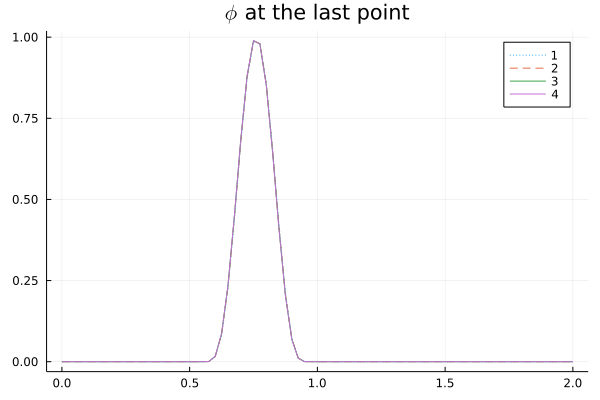

In [183]:
plot(t,ϕ_R_1[end,:],label="1",ls=:dot, title=L"\phi"*" at the last point")
plot!(t,ϕ_R_2[end,:],label="2",ls=:dash)
plot!(t,ϕ_R_3[end,:],label="3")
plot!(t,ϕ_R_4[end,:],label="4")

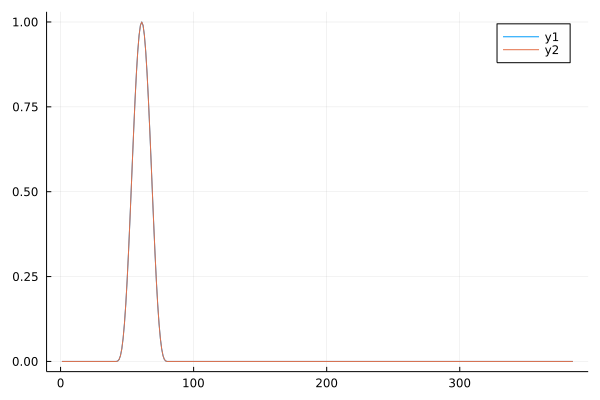

In [184]:
plot(ϕ_R_2[1:end,n])
plot!(ϕ_R_1[1:end,n])

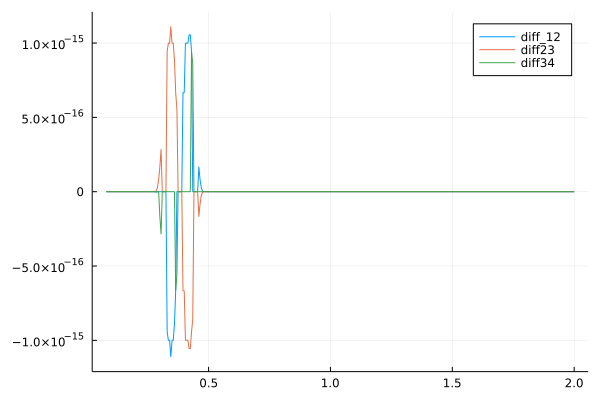

In [185]:
n=1


plot(r[1:end],ϕ_R_2[1:end,n]-ϕ_R_1[1:end,n],label="diff_12")
plot!(r[1:end],ϕ_R_3[1:end,n]-ϕ_R_2[1:end,n],label="diff23")
plot!(r[1:end],ϕ_R_4[1:end,n]-ϕ_R_3[1:end,n],label="diff34")

In [186]:
Q234 = [sum(abs.(ϕ_R_2[:,i] - ϕ_R_3[:,i]))/sum(abs.(ϕ_R_3[:,i] -ϕ_R_4[:,i])) for i in 2:M_d]
Q123 = [sum(abs.(ϕ_R_1[:,i] - ϕ_R_2[:,i]))/sum(abs.(ϕ_R_2[:,i] -ϕ_R_3[:,i])) for i in 2:M_d]

80-element Vector{Float64}:
 14.953332226847786
 14.800033504661949
 15.067101210215116
 13.597125334208766
 13.395185910513797
 13.724060413363608
 14.22429808153207
 14.07222575413548
 13.923486368477887
 13.965048464225546
  ⋮
  8.703968241468536
  8.708984039146344
  8.772308736444995
  8.786953147983745
  8.767243875442775
  8.774071262126078
  8.738426558998592
  8.744629352260855
  8.7276999326491

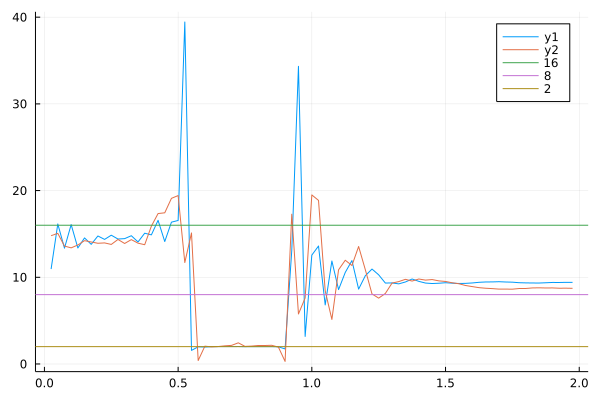

In [187]:
s = 80
plot(t[2:s],Q234[2:s])
plot!(t[2:s],Q123[2:s])
hline!([16],label="16")
hline!([8],label="8")
hline!([2],label="2")

In [188]:
t[2,end]

0.025